In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
import pickle
from sklearn import preprocessing
import matplotlib.pyplot as plt
# using Seaborn Style
plt.style.use('seaborn')

In [2]:
# Reading CSV File using Pandas
df = pd.read_csv('../Real estate.csv')

In [3]:
# Columns Names
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [4]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
#Normalizing The Dataset
df_norm = pd.DataFrame(preprocessing.normalize(df),columns=df.columns)

In [6]:
df_norm.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,0.000495,0.996909,0.015848,0.042037,0.004953,0.012373,0.060194,0.018770
1,0.000980,0.986502,0.009557,0.150258,0.004411,0.012243,0.059565,0.020682
2,0.001432,0.961229,0.006349,0.268276,0.002387,0.011928,0.058022,0.022580
3,0.001909,0.961141,0.006349,0.268263,0.002387,0.011928,0.058019,0.026159
4,0.002434,0.979673,0.002434,0.190095,0.002434,0.012158,0.059156,0.020977


In [7]:
X,y = df_norm[["X2 house age","X3 distance to the nearest MRT station"]].values,df_norm["Y house price of unit area"].values

In [8]:
# Shape of X and y
X.shape,y.shape

((414, 2), (414,))

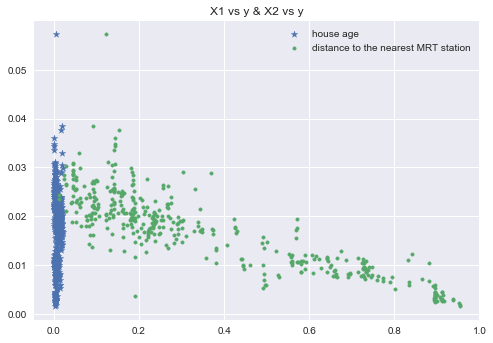

In [9]:
# Plot Between X1 and y && X2 and y
plt.scatter(X[:,0],y,marker='*',label="house age")
plt.scatter(X[:,1],y,marker='.',label="distance to the nearest MRT station")
plt.title("X1 vs y & X2 vs y")
plt.legend()
plt.show()

In [10]:
# Splitting dataset in training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
# creating Linearregression model
model = LinearRegression()

In [12]:
# Fitting the model
model.fit(X_train,y_train)

LinearRegression()

In [13]:
# Saving the model using pickle
_model = "model.sav"
with open(_model,"wb+") as f:
    pickle.dump(model,f)

In [14]:
#Loading the model using pickle
with open(_model,"rb+") as f:
    model = pickle.load(f)

In [15]:
# Generating prediction of X_train and X_test 
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

In [16]:
# Saving Comparison of y_test_actual Vs y_test_predicted
yTestDF = pd.DataFrame({'y_test_actual' : y_test,'y_test_predicted' : y_test_predicted})
yTestDF.to_csv('y_test.csv',index=False)

# Saving Comparison of y_train_actual Vs y_train_predicted
yTrainDF = pd.DataFrame({'y_train_actual' : y_train,'y_train_predicted' : y_train_predicted})
yTrainDF.to_csv('y_train.csv',index=False)

In [17]:
# Model's Coefficient and Intercept
model.coef_,model.intercept_,

(array([-0.246001  , -0.02588088]), 0.028422853148569783)

#### Linear Regression
**y = m1 * x1 + m2 * x2 + c**
```
Here,
x1 = House age

x2 = Distance to the nearest MRT station

y = House price of unit area


m1 = -0.230986

m2 = -0.00739114

c = 50.512646973853776
```

In [18]:
# Genrating a Best Fit Line
m1, m2 = model.coef_
c = model.intercept_

_X1 = np.linspace(min(X[:,0]),max(X[:,0]),100)
_X2 = np.linspace(min(X[:,1]),max(X[:,1]),100)
_y = m1 * _X1 + m2 * _X2 + c

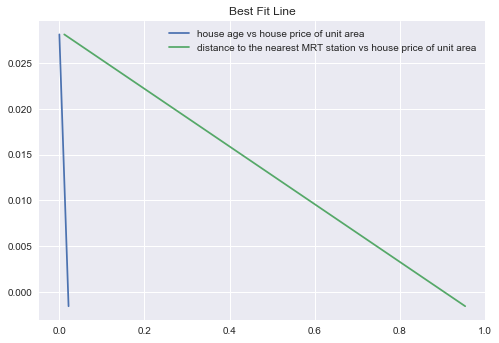

In [19]:
#plotting The Best Fit Line
plt.plot(_X1,_y,label="house age vs house price of unit area")
plt.plot(_X2,_y,label="distance to the nearest MRT station vs house price of unit area")
plt.title("Best Fit Line")
plt.legend()
plt.show()

In [20]:
# Genrating Correlation between X and y

corr1 = pd.Series(y).corr(pd.Series(X[:,0]))
corr2 = pd.Series(y).corr(pd.Series(X[:,1]))

print(corr1)
print(corr2)

print("Since Absolute Value of corr2 is greater than corr1, that means Distance to the nearest MRT station is more significant predictor of house price.")

0.06291588852786793
-0.8490051041799057
Since Absolute Value of corr2 is greater than corr1, that means Distance to the nearest MRT station is more significant predictor of house price.


In [21]:
# Calculating all Errors
def calculateError(y_actual,y_pred):
    MSE = mean_squared_error(y_actual,y_pred)
    MAE = mean_absolute_error(y_actual,y_pred)
    RMSE = np.sqrt(MSE)
    return MSE,MAE,RMSE

In [22]:
err = calculateError(y_train,y_train_predicted)
trainError = {
    "Mean Square Error" : err[0],
    "Mean Absolute Error" : err[1],
    "Root Mean Square Error" : err[2]
}

err = calculateError(y_test,y_test_predicted)
testError = {
    "Mean Square Error" : err[0],
    "Mean Absolute Error" : err[1],
    "Root Mean Square Error" : err[2]
}

In [23]:
trainError

{'Mean Square Error': 1.6452977361902908e-05,
 'Mean Absolute Error': 0.002580247788872046,
 'Root Mean Square Error': 0.004056226985993622}

In [24]:
testError

{'Mean Square Error': 1.4101654076483651e-05,
 'Mean Absolute Error': 0.0023702337612418176,
 'Root Mean Square Error': 0.0037552169147046155}